# 1 Import and Init 

## 1.1 Python and Stuffs

In [110]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from time import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import random
import pandas as pd
import os

In [3]:
seed=45
random.seed(seed)
np.random.seed(seed)

In [111]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")


## 1.2 Parameters 


In [112]:
# Filesystem
Data_dir = "/home/onyxia/work/TMDb-Box-Office-Prediction/Data"   #same level as course repo in the data directory
Codes_dir = "/home/onyxia/work/TMDb-Box-Office-Prediction/Codes" 
Outputs_dir="/home/onyxia/work/TMDb-Box-Office-Prediction/Outputs" 
      ##afficher le contenu du repertoire DATA_DIR
!ls -l $Data_dir
# Preprocessing andd load
scale=0.2

# Modele

total 538024
drwxr-sr-x 2 onyxia users      4096 Apr  7 13:42 images
-rw-r--r-- 1 onyxia users     61585 Apr  7 13:42 sample_submission.csv
-rw-r--r-- 1 onyxia users  41868556 Apr  7 13:42 test.csv
-rw-r--r-- 1 onyxia users    321959 Apr  8 16:12 test_df.csv
-rw-r--r-- 1 onyxia users 480349033 Apr  8 09:41 TMDB_movie_dataset_v11.csv
-rw-r--r-- 1 onyxia users  28311747 Apr  7 13:42 train.csv


# 2 Load Data


## 2.1 Retrive Data

In [116]:

def load_data(in_path, name,n_display=1,show_info=False):
    df = pd.read_csv(in_path)
    #df.set_index('id', inplace=True)
    print(f"{name}: shape is {df.shape}")
    if show_info==True:
        print(df.info())
    
    display(df.head(n_display))
    return df


In [117]:
ds_name = 'test_df'

Raw_df = load_data(os.path.join(Data_dir, f'{ds_name}.csv'), ds_name)



test_df: shape is (47, 27)


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,crew,cast,belongs_to_collection
0,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...","Jonathan Nolan, Hans Zimmer, Wally Pfister, Ja...","Christian Bale, Heath Ledger, Michael Caine, G...",The Dark Knight Collection


In [118]:
ds_name_oldDF = 'train'

Raw_df_oldDF = load_data(os.path.join(Data_dir, f'{ds_name_oldDF}.csv'), ds_name_oldDF)

train: shape is (3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [119]:
cols=Raw_df.columns

In [8]:
cols

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords', 'crew', 'cast', 'belongs_to_collection'],
      dtype='object')

In [120]:
Raw_df = Raw_df.rename(columns={'keywords': 'Keywords'})


In [121]:
print(eval(Raw_df_oldDF.belongs_to_collection[0])[0],"\n")
print(eval(Raw_df_oldDF.crew[0])[0],"\n")
print(eval(Raw_df_oldDF.cast[0])[0])

{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'} 

{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None} 

{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}


In [122]:
print(Raw_df.belongs_to_collection[0],"\n") # on retourne ici la valeur associé à name dans belongs_to_collection dans Raw_dfOld 
print(Raw_df.crew[0],"\n")
print(Raw_df.cast[0])



The Dark Knight Collection 

Jonathan Nolan, Hans Zimmer, Wally Pfister, James Newton Howard, Christopher Nolan, Charles Roven, Emma Thomas, Christopher Nolan, David S. Goyer, Thomas Tull, Michael Uslan, Kevin De La Noy, Benjamin Melniker, Lee Smith, Nathan Crowley, Peter Lando, John Papsidera, Lindy Hemming, Mark Bartholomew, James Hambidge, Craig Jackson, Steven Lawrence, Naaman Marshall, Deena Adair, Sue Robb-King, John Caglione Jr., Nancy Hancock, Jenne Lee, Nicholas Gall, Lucinda Syson, Steve Gehrke, Richard M. Daley, Janice Alexander, Kevin Kavanaugh, Simon Lamont, Brad Dechter, Alyson Dee Moore, Dennis Davidson, Kimberley Spiteri, Stephen Vaughan, Alex Gibson, Daniel Pinder, Richard King, Richard King, Ed Novick, Lora Hirschberg, Gary Rizzo, Michael W. Mitchell, Michael Babcock, Bob Gorelick, Bob Gorelick, Tom Struthers, Paul Jennings, Rick LeFevour, Jim Wilkey, Mark Mottram, Lorne Orleans, Nilo Otero, Jeff Atmajian, Donald Likovich, Rick Avery, Tom McComas, Bruce Fowler, Bob Ka

In [123]:
len(Raw_df_oldDF.columns)

23

In [124]:
Raw_df_columns=set(Raw_df.columns)
Raw_df_oldDF_columns=set(Raw_df_oldDF.columns)


In [125]:
len(Raw_df_columns),len(Raw_df_oldDF_columns)

(27, 23)

In [126]:
Raw_df_columns.difference(Raw_df_oldDF_columns)

{'adult', 'backdrop_path', 'vote_average', 'vote_count'}

In [127]:
col_to_keep=list(Raw_df_columns & Raw_df_oldDF_columns)


In [29]:
len(col_to_keep)

23

In [128]:
df=Raw_df[col_to_keep].copy()

In [129]:
ds_name = 'Test_df'
print(f'dataset {ds_name:24}: [ {df.shape[0]:10,}, {df.shape[1]}]')

dataset Test_df                 : [         47, 23]


## 2.2 Concatenate, shuffle and split

In [130]:
n=int(df.shape[0]/3)

In [131]:
df1,df2,df3=df.iloc[:n,],df.iloc[n:2*n,],df.iloc[2*n:,]

In [132]:
def con_shuf_split(df1,df2,df3,scale=0.2):
    df=pd.concat([df1.copy(),df2.copy(),df3.copy()])
    n=df1.shape[0]+df2.shape[0]+df3.shape[0]
    p=np.random.permutation(range(n))
    split1_size=n-int(n*scale)
    split1_index=p[:split1_size]
    split2_index=p[split1_size:]

    split1=df.iloc[split1_index,]
    split2=df.iloc[split2_index,]

    return split1,split2

In [133]:
df_train,df_test=con_shuf_split(df1,df2,df3,scale=0.2)

In [134]:
df_train.shape

(38, 23)

# 3 Descriptive Statistique


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 43
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spoken_languages       38 non-null     object 
 1   belongs_to_collection  29 non-null     object 
 2   genres                 38 non-null     object 
 3   id                     38 non-null     int64  
 4   production_countries   38 non-null     object 
 5   revenue                38 non-null     int64  
 6   imdb_id                38 non-null     object 
 7   crew                   38 non-null     object 
 8   original_title         38 non-null     object 
 9   original_language      38 non-null     object 
 10  popularity             38 non-null     float64
 11  runtime                38 non-null     int64  
 12  budget                 38 non-null     int64  
 13  tagline                38 non-null     object 
 14  homepage               36 non-null     object 
 15  production_co

In [39]:
df_train.describe() #only 4 numerical features

,id,revenue,popularity,runtime,budget
count,38.000000,3.800000e+01,38.000000,38.000000,3.800000e+01
mean,73373.236842,8.638951e+08,80.257132,142.315789,1.380658e+08
std,117735.993242,6.176008e+08,31.549709,21.904097,7.285084e+07
min,13.000000,2.834147e+07,29.577000,95.000000,8.500000e+06
25%,620.000000,4.063317e+08,57.236750,126.250000,7.925000e+07
50%,10759.500000,7.812906e+08,77.616500,140.500000,1.400000e+08
75%,99069.750000,1.079396e+09,96.256250,152.750000,1.800000e+08
max,475557.000000,2.923706e+09,185.482000,201.000000,3.560000e+08


In [40]:
df_train.describe(include='all') #look at all categorical and numerical

,spoken_languages,belongs_to_collection,genres,id,production_countries,revenue,imdb_id,crew,original_title,original_language,...,tagline,homepage,production_companies,status,cast,title,overview,Keywords,poster_path,release_date
count,38,30,38,38.000000,38,3.800000e+01,38,38,38,38,...,38,36,38,38,38,38,38,38,38,38
unique,15,18,26,NaN,7,NaN,38,38,38,1,...,38,35,26,1,38,38,38,38,38,38
top,English,Harry Potter Collection,"Adventure, Fantasy, Action",NaN,United States of America,NaN,tt0330373,"Mike Newell, Steve Kloves, J.K. Rowling, David...",Harry Potter and the Goblet of Fire,en,...,Dark And Difficult Times Lie Ahead.,http://www.lordoftherings.net/,Marvel Studios,Released,"Daniel Radcliffe, Rupert Grint, Emma Watson, B...",Harry Potter and the Goblet of Fire,When Harry Potter's name emerges from the Gobl...,"witch, dying and death, based on novel or book...",/fECBtHlr0RB3foNHDiCBXeg9Bv9.jpg,2005-11-16
freq,23,4,5,NaN,25,NaN,1,1,1,38,...,1,2,11,38,1,1,1,1,1,1
mean,NaN,NaN,NaN,73373.236842,NaN,8.638951e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,117735.993242,NaN,6.176008e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,13.000000,NaN,2.834147e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,620.000000,NaN,4.063317e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,10759.500000,NaN,7.812906e+08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,99069.750000,NaN,1.079396e+09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


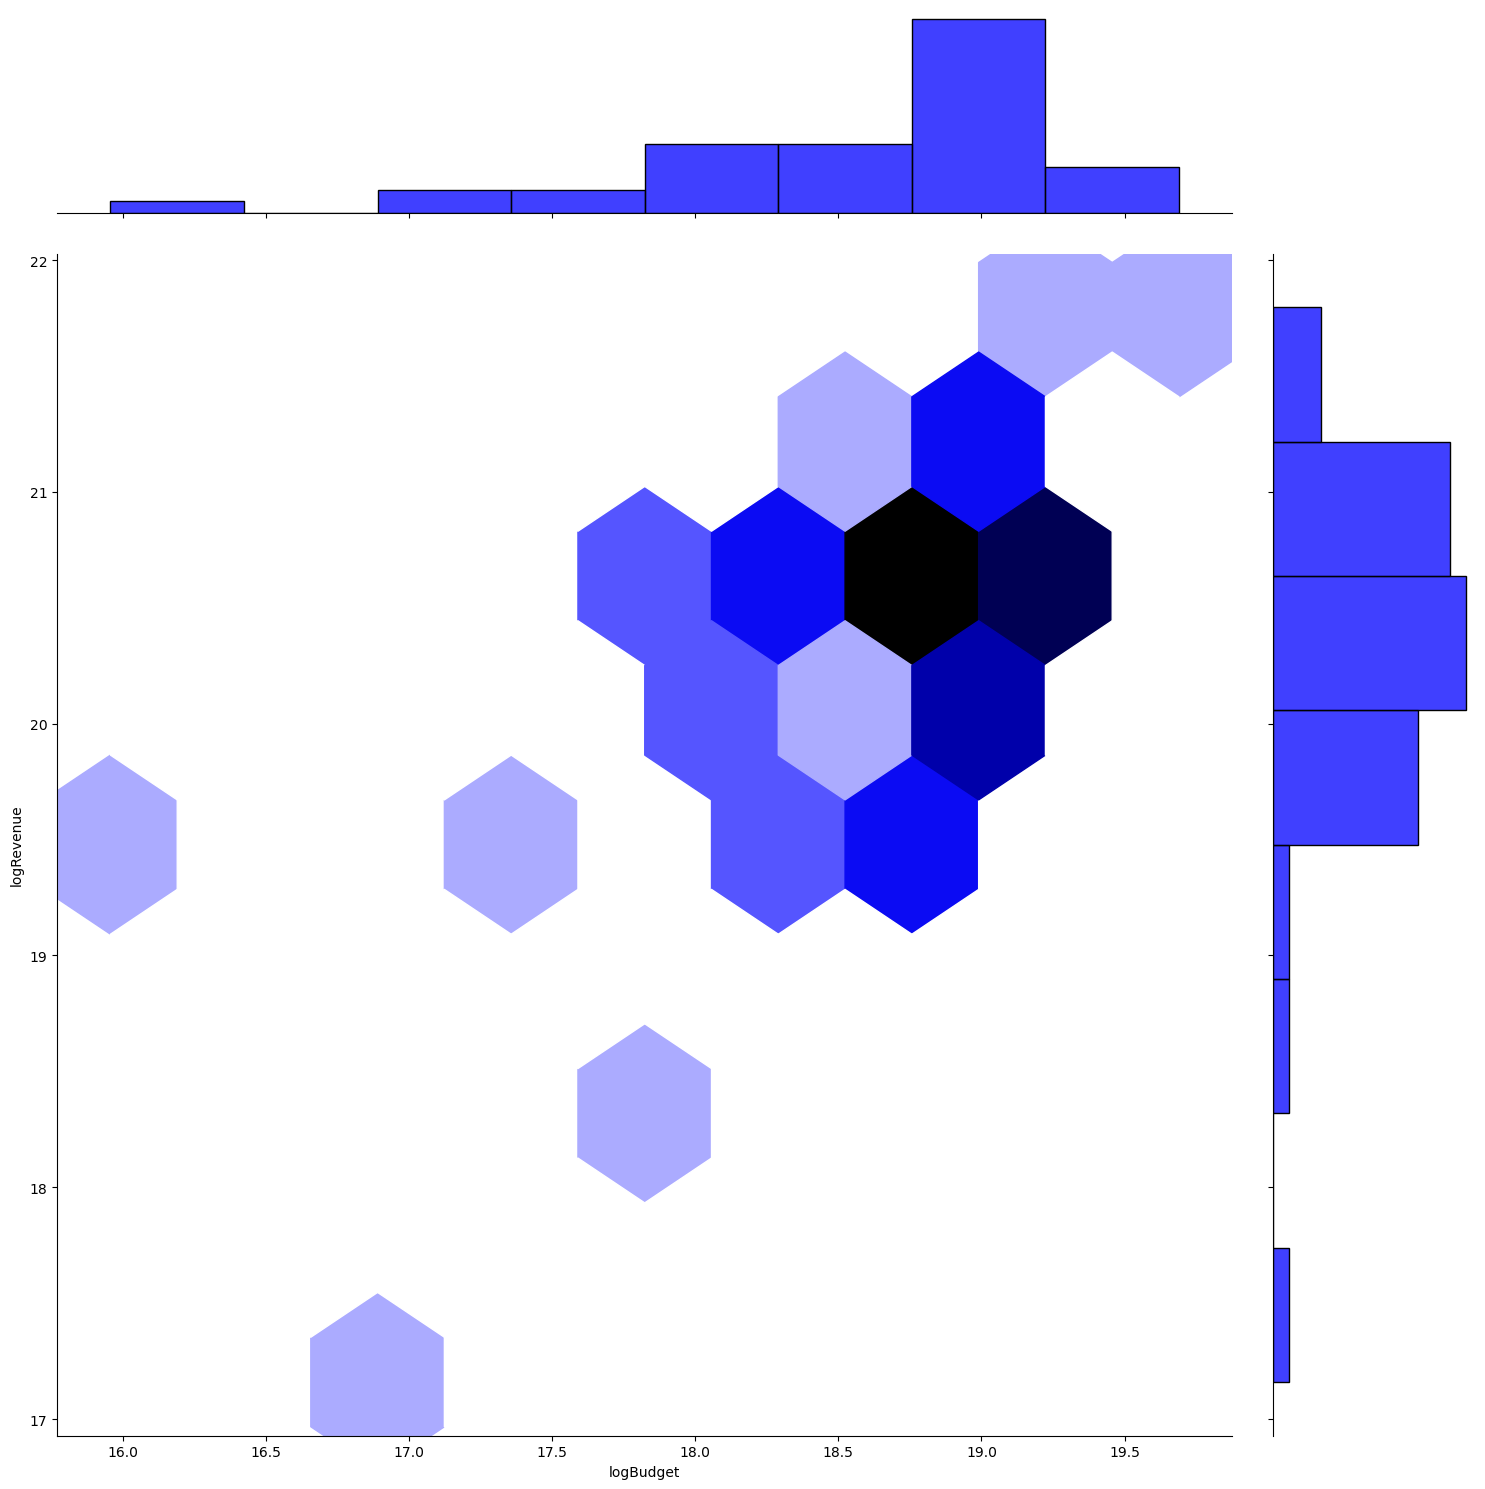

In [41]:
df_train['logRevenue']=np.log1p(df_train['revenue'])
df_train['logBudget']=np.log1p(df_train['budget'])
sns.jointplot(x="logBudget", y="logRevenue", data=df_train, height=15, ratio=5, color="b", kind='hex')


### Distribution of the target column 

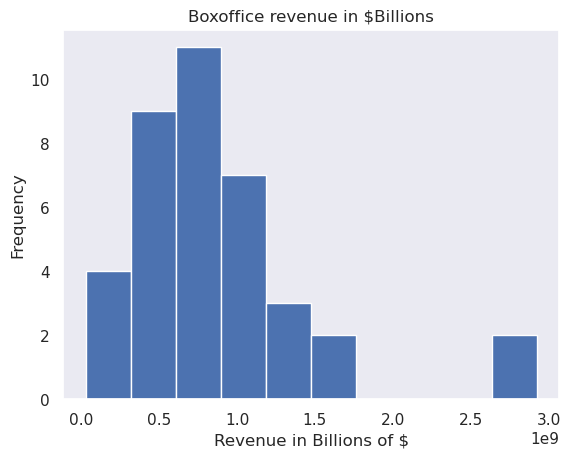

In [45]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
df_train['revenue'].astype(float).plot.hist()
plt.xlabel("Revenue in Billions of $")
plt.ylabel("Frequency")
plt.title("Boxoffice revenue in $Billions")
plt.grid()


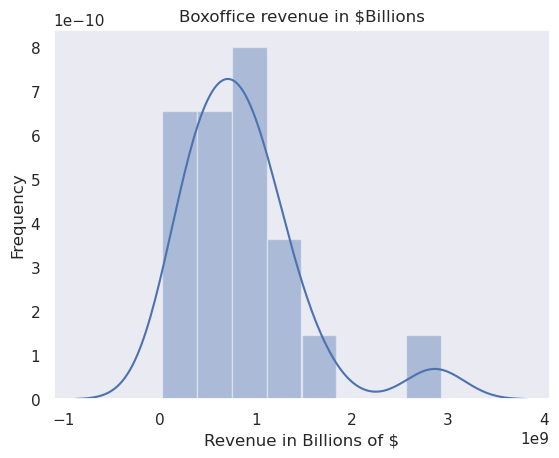

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
sns.distplot(df_train['revenue'] )
plt.xlabel("Revenue in Billions of $")
plt.ylabel("Frequency")
plt.title("Boxoffice revenue in $Billions")
plt.grid()


#### Take log of target variable (revenue)
Because revenue variable is skewed, let's calculate log of it.



Text(0.5, 1.0, 'log Boxoffice revenue in $Billions')

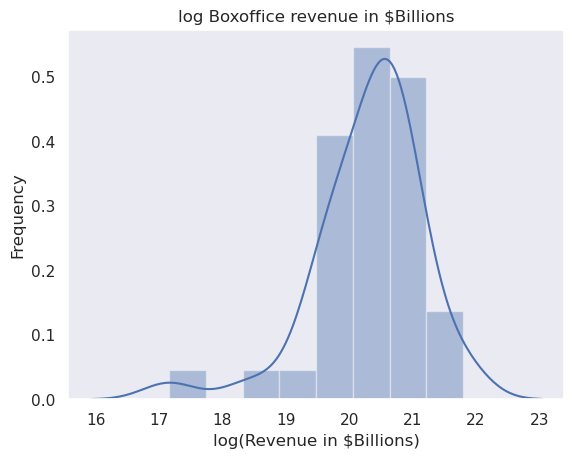

In [47]:
df_train['logRevenue'] = np.log1p(df_train['revenue'])
sns.distplot(df_train['logRevenue'] )
plt.grid()
plt.xlabel("log(Revenue in $Billions)")
plt.ylabel("Frequency")
plt.title("log Boxoffice revenue in $Billions")


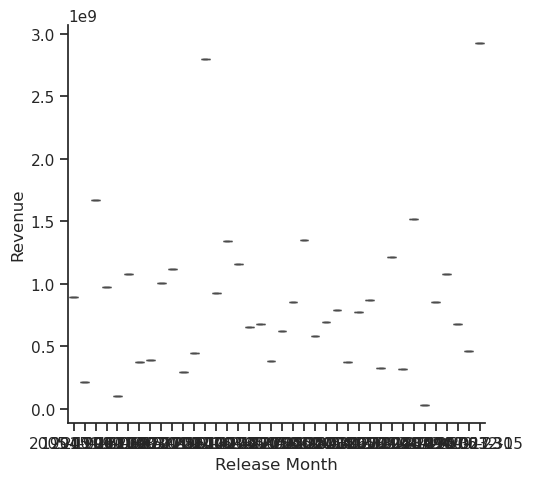

In [48]:
#Run cells below before running completely the preprocessing
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="release_date",y= "revenue", data=df_train, kind="box")
    g.set_axis_labels("Release Month", "Revenue");
    

In [49]:
colonnes_objects = df_train.select_dtypes(include=['object']).columns.tolist()


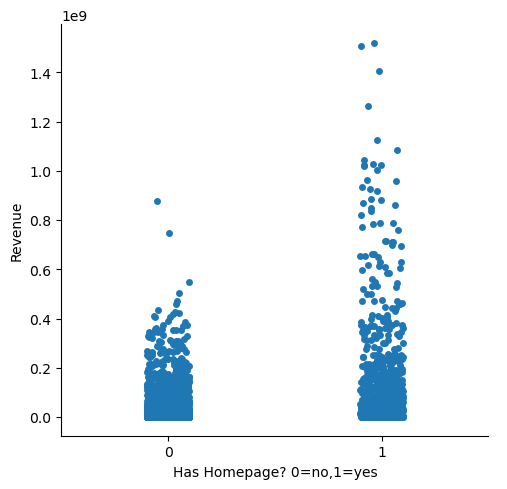

In [130]:
#Run cells below before running completely the preprocessing
g=sns.catplot(x="has_homepage", y="revenue", data=df_train);
g.set_axis_labels("Has Homepage? 0=no,1=yes", "Revenue");

<Axes: >

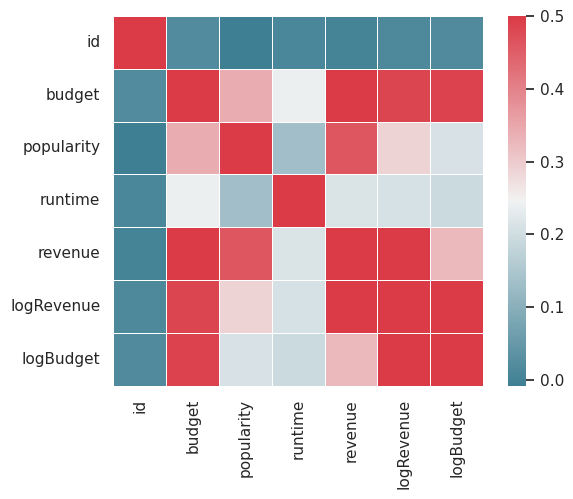

In [32]:
colonnes_numeriques = df_train.select_dtypes(include=['int', 'float']).columns.tolist()
num_df_train=df_train[colonnes_numeriques]
corr=num_df_train.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.5, square=True, linewidths=.5)

#  4 Preprocessing


##  4.1 Fill NaN Update and/or Convert in power 6 some column values 
for instance updating the budget of Beethoven movie 

In [136]:
df_train['budget'].fillna('median')
df_train['popularity'].fillna('median')
df_train['runtime'].fillna('median')

df_train.loc[df_train['id'] == 16,'revenue'] = 192864          # Skinning
df_train.loc[df_train['id'] == 90,'budget'] = 30000000         # Sommersby          
df_train.loc[df_train['id'] == 118,'budget'] = 60000000        # Wild Hogs
df_train.loc[df_train['id'] == 149,'budget'] = 18000000        # Beethoven
df_train.loc[df_train['id'] == 313,'revenue'] = 12000000       # The Cookout 
df_train.loc[df_train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
df_train.loc[df_train['id'] == 464,'budget'] = 20000000        # Parenthood
df_train.loc[df_train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
df_train.loc[df_train['id'] == 513,'budget'] = 930000          # From Prada to Nada
df_train.loc[df_train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
df_train.loc[df_train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
df_train.loc[df_train['id'] == 850,'budget'] = 90000000        # Modern Times
df_train.loc[df_train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
df_train.loc[df_train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
df_train.loc[df_train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
df_train.loc[df_train['id'] == 1542,'budget'] = 1              # All at Once
df_train.loc[df_train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
df_train.loc[df_train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
df_train.loc[df_train['id'] == 1714,'budget'] = 46000000       # The Recruit
df_train.loc[df_train['id'] == 1721,'budget'] = 17500000       # Cocoon
df_train.loc[df_train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
df_train.loc[df_train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
df_train.loc[df_train['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
df_train.loc[df_train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
df_train.loc[df_train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
df_train.loc[df_train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
df_train.loc[df_train['id'] == 2801,'budget'] = 10000000       # Fracture
df_test.loc[df_test['id'] == 3889,'budget'] = 15000000       # Colossal
df_test.loc[df_test['id'] == 6733,'budget'] = 5000000        # The Big Sick
df_test.loc[df_test['id'] == 3197,'budget'] = 8000000        # High-Rise
df_test.loc[df_test['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
df_test.loc[df_test['id'] == 5704,'budget'] = 4300000        # French Connection II
df_test.loc[df_test['id'] == 6109,'budget'] = 281756         # Dogtooth
df_test.loc[df_test['id'] == 7242,'budget'] = 10000000       # Addams Family Values
df_test.loc[df_test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
df_test.loc[df_test['id'] == 5591,'budget'] = 4000000        # The Orphanage
df_test.loc[df_test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

power_six = df_train.id[df_train.budget > 1000][df_train.revenue < 100]

for k in power_six :
    df_train.loc[df_train['id'] == k,'revenue'] =  df_train.loc[df_train['id'] == k,'revenue'] * 1000000

In [137]:

target = "revenue"

X = df_train.drop(target, axis=1)
y = df_train[target]

X_train, X_reminds, y_train, y_reminds = train_test_split(X, y, train_size=0.7, test_size=0.15, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_reminds, y_reminds, test_size=0.15, random_state=42)

In [138]:
print("X_train.shape",X_train.shape ,"y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape,"y_test.shape",y_test.shape)
print("X_valid.shape",X_valid.shape,"y_valid.shape",y_valid.shape)

X_train.shape (26, 22) y_train.shape (26,)
X_test.shape (5, 22) y_test.shape (5,)
X_valid.shape (1, 22) y_valid.shape (1,)


## 4.2 Clean categorical features
for instance ,here, transform naturally a string of a list of dictionary into  dictionary

def string_to_dict(string):
    a={}
    b=[]
    if pd.isna(string)!= True and string!={} and string !="{}" and len(string) >0:
        if type(string)=='str' or type(string)==str:
            b=eval(string)
            a=b
        else:
            a=string
    if type(a)==list:
        if len(a)==0:
            a={}
        else :
            a=a[0]
    return a
    

In [139]:
# Aplly our above function for transforming our categorical columns
dict_columns = ['belongs_to_collection', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']


#for column in dict_columns:
        #
        #X_train[column] = X_train[column].apply(string_to_dict)
        #X_test[column] = X_test[column].apply(string_to_dict)
        #X_valid[column] = X_valid[column].apply(string_to_dict)

## 4.3 Encoding
Genre,Belongs_to_Collection and Homepage Binarization

### 4.3.1 Slight transfomation on "genres" variable

In [140]:
# Concaténer les ensembles de données train, test et validation
X_all = pd.concat([X_train, X_test, X_valid], axis=0)

# Diviser la colonne 'genres' en plusieurs colonnes en fonction de la virgule
X_all_genres = X_all['genres'].str.split(', ', expand=True)

# Convertir chaque genre en colonnes binaires
X_all_genres = pd.get_dummies(X_all_genres.apply(lambda x: pd.Series(x).str.strip()), prefix='', prefix_sep='').groupby(level=0, axis=1).sum()

# Renommer les colonnes binaires pour correspondre aux noms de colonnes du premier code
X_all_genres.columns = ['genre_' + col.replace(' ', '_') for col in X_all_genres.columns]

# Ajouter les colonnes binaires encodées en one-hot au DataFrame complet
X_all = pd.concat([X_all, X_all_genres], axis=1)

# Diviser à nouveau l'ensemble de données en ensembles de train, test et validation
X_train = X_all.iloc[:len(X_train)]
X_test = X_all.iloc[len(X_train):len(X_train) + len(X_test)]
X_valid = X_all.iloc[len(X_train) + len(X_test):]


In [55]:
X_train.columns

Index(['spoken_languages', 'belongs_to_collection', 'genres', 'id',
       'production_countries', 'imdb_id', 'crew', 'original_title',
       'original_language', 'popularity', 'runtime', 'budget', 'tagline',
       'homepage', 'production_companies', 'status', 'cast', 'title',
       'overview', 'Keywords', 'poster_path', 'release_date', 'logRevenue',
       'logBudget', 'genre_Action', 'genre_Adventure', 'genre_Comedy',
       'genre_Crime', 'genre_Drama', 'genre_Fantasy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Thriller',
       'genre_War'],
      dtype='object')

## 4.3.2 One Encoding

In [141]:
# Binarization of "homepagee, "released"

X_train['has_homepage'] = 1
X_train.loc[pd.isnull(X_train['homepage']) ,"has_homepage"] = 0
X_test['has_homepage'] = 1
X_test.loc[pd.isnull(X_test['homepage']) ,"has_homepage"] = 0
X_valid['has_homepage'] = 1
X_valid.loc[pd.isnull(X_valid['homepage']) ,"has_homepage"] = 0


X_train['released'] = 1
X_train.loc[pd.isnull(X_train['status']) ,"released"] = 0
X_test['released'] = 1
X_test.loc[pd.isnull(X_test['status']) ,"released"] = 0
X_valid['released'] = 1
X_valid.loc[pd.isnull(X_valid['status']) ,"released"] = 0


Let's get a count of how many production countries are involved in a production

In [59]:
type(X_train.production_countries)

pandas.core.series.Series

In [60]:
X_train.production_countries.shape

(26,)

In [61]:
X_train.production_countries[0]

'United Kingdom, United States of America'

In [142]:

# Définir la fonction count_strings
def count_strings(s):
    """
    Cette fonction compte le nombre de sous-chaînes séparées par des virgules dans une chaîne donnée.
    
    Args:
    - s (str): La chaîne de caractères à analyser.
    
    Returns:
    - int: Le nombre de sous-chaînes, ou NaN si la chaîne est nulle.
    """
    # Vérifier si la chaîne est nulle
    if pd.isna(s):
        return np.nan
    
    # Diviser la chaîne en fonction des virgules et compter le nombre de sous-chaînes obtenues
    return len(s.split(','))



In [143]:
# Appliquer la fonction count_strings à la colonne 'production_countries' du DataFrame
X_train['production_countries_count'] = X_train['production_countries'].apply(count_strings)
X_test['production_countries_count'] = X_test['production_countries'].apply(count_strings)
X_valid['production_countries_count'] = X_valid['production_countries'].apply(count_strings)

### Production Companies

In [65]:
X_train.production_countries.iloc[:2]

34                 United States of America
17    New Zealand, United States of America
Name: production_countries, dtype: object

In [144]:
# Appliquer la fonction count_strings aux colonnes 'production_companies' et "spoken_languages" du DataFrame

# take counts of each
X_train['production_companies_count'] = X_train['production_companies'].apply(count_strings)
X_train['spoken_languages_count'] = X_train['spoken_languages'].apply(count_strings)

X_test['production_companies_count'] = X_test['production_companies'].apply(count_strings)
X_test['spoken_languages_count'] = X_test['spoken_languages'].apply(count_strings)

X_valid['production_companies_count'] = X_valid['production_companies'].apply(count_strings)
X_valid['spoken_languages_count'] = X_valid['spoken_languages'].apply(count_strings)

In [67]:
X_train.production_companies_count.shape

(26,)

## Keywords, cast, crew

In [69]:
print(Raw_df.Keywords[0],"\n") # on retourne ici la valeur associé à name dans belongs_to_collection dans Raw_dfOld 
print(Raw_df.crew[0],"\n")
print(Raw_df.cast[0])


joker, sadism, chaos, secret identity, crime fighter, superhero, anti hero, scarecrow, based on comic, vigilante, organized crime, tragic hero, anti villain, criminal mastermind, district attorney, super power, super villain, neo-noir 

Jonathan Nolan, Hans Zimmer, Wally Pfister, James Newton Howard, Christopher Nolan, Charles Roven, Emma Thomas, Christopher Nolan, David S. Goyer, Thomas Tull, Michael Uslan, Kevin De La Noy, Benjamin Melniker, Lee Smith, Nathan Crowley, Peter Lando, John Papsidera, Lindy Hemming, Mark Bartholomew, James Hambidge, Craig Jackson, Steven Lawrence, Naaman Marshall, Deena Adair, Sue Robb-King, John Caglione Jr., Nancy Hancock, Jenne Lee, Nicholas Gall, Lucinda Syson, Steve Gehrke, Richard M. Daley, Janice Alexander, Kevin Kavanaugh, Simon Lamont, Brad Dechter, Alyson Dee Moore, Dennis Davidson, Kimberley Spiteri, Stephen Vaughan, Alex Gibson, Daniel Pinder, Richard King, Richard King, Ed Novick, Lora Hirschberg, Gary Rizzo, Michael W. Mitchell, Michael Babc

In [70]:
# number of keywords
X_train['keyword_count'] = X_train['Keywords'].apply(count_strings)
X_test['keyword_count'] = X_test['Keywords'].apply(count_strings)
X_valid['keyword_count'] = X_valid['Keywords'].apply(count_strings)

In [146]:
# count of crew
X_train['crew_count'] = X_train['crew'].apply(count_strings)
X_test['crew_count'] = X_test['crew'].apply(count_strings)
X_valid['crew_count'] = X_valid['crew'].apply(count_strings)


In [147]:
# count of cast members
X_train['cast_count'] = X_train['cast'].apply(count_strings)
X_test['cast_count'] = X_test['cast'].apply(count_strings)
X_valid['cast_count'] = X_valid['cast'].apply(count_strings)


In [73]:
X_train.runtime.isna().sum(),X_test.runtime.isna().sum(),X_valid.runtime.isna().sum()

(0, 0, 0)

In [74]:
X_train.runtime = X_train.runtime.fillna(0) # two null values here
X_test.runtime = X_test.runtime.fillna(0) 
X_valid.runtime = X_valid.runtime.fillna(0) 

## Fixing Release Date
    "la date de sortie prévue ou de la date de publication d'un produit ou d'un service."

In [75]:
X_train.release_date.isnull().sum(),X_test.release_date.isnull().sum(),X_valid.release_date.isnull().sum()



(0, 0, 0)

In [50]:
X_test.release_date.isnull().sum()

0

In [148]:
train=X_train.copy()
val=X_valid.copy()
test=X_test.copy()

In [181]:
X_train=train.copy()
X_valid=val.copy()
X_test=test.copy()

In [182]:
int(X_train.release_date[0][:4]),X_test.release_date[28],X_valid.release_date[17]

(2008, '2009-08-19', '2001-12-18')

In [183]:
def datefix(x):
    return int(x[:4])

In [184]:
# Train

X_train['release_year'] = X_train['release_date'].apply(lambda x: datefix(x))


# Test

X_test['release_year'] = X_test['release_date'].apply(lambda x: datefix(x))

# Validation

X_valid['release_year'] = X_valid['release_date'].apply(lambda x: datefix(x))

17    2001
Name: release_year, dtype: int64

In [186]:
def Monthfix(x):
    return int(x[5:7])

In [187]:
# Train

X_train['release_month'] = X_train['release_date'].apply(lambda x: Monthfix(x))


# Test

X_test['release_month'] = X_test['release_date'].apply(lambda x: Monthfix(x))

# Validation

X_valid['release_month'] = X_valid['release_date'].apply(lambda x: Monthfix(x))

In [188]:
X_test.release_month

28     8
25     2
37     4
3      2
33    12
Name: release_month, dtype: int64

In [196]:
X_train.columns

Index(['spoken_languages', 'belongs_to_collection', 'genres', 'id',
       'production_countries', 'imdb_id', 'crew', 'original_title',
       'original_language', 'popularity', 'runtime', 'budget', 'tagline',
       'homepage', 'production_companies', 'status', 'cast', 'title',
       'overview', 'Keywords', 'poster_path', 'release_date', 'genre_Action',
       'genre_Adventure', 'genre_Comedy', 'genre_Crime', 'genre_Drama',
       'genre_Fantasy', 'genre_Mystery', 'genre_Romance',
       'genre_Science_Fiction', 'genre_Thriller', 'genre_War', 'has_homepage',
       'released', 'production_countries_count', 'production_companies_count',
       'spoken_languages_count', 'crew_count', 'cast_count', 'release_year',
       'release_month', 'keyword_count'],
      dtype='object')

In [195]:
# number of keywords
X_train['keyword_count'] = X_train['Keywords'].apply(count_strings)
X_test['keyword_count'] = X_test['Keywords'].apply(count_strings)
X_valid['keyword_count'] = X_valid['Keywords'].apply(count_strings)

In [190]:
y_train.shape,X_train.shape[0]

((26,), 26)

In [194]:
X_train.spoken_languages[0]

'English, Mandarin'

In [201]:
col_to_drop=set(["spoken_languages","title","imdb_id","runtime","original_language","tagline","id","overview","poster_path","original_title","","genres",'id',
       'production_countries', 'imdb_id', 'crew', 'original_title',
       'original_language','homepage', 'production_companies', 'status', 'cast', 'title',
       'overview', 'Keywords', 'poster_path', 'release_date'])
final_col_to_keep=list(set(X_train.columns).difference(col_to_drop))

In [202]:
final_col_to_keep

['genre_Fantasy',
 'released',
 'belongs_to_collection',
 'genre_Comedy',
 'genre_Action',
 'genre_Science_Fiction',
 'release_year',
 'production_companies_count',
 'genre_Adventure',
 'crew_count',
 'genre_Romance',
 'has_homepage',
 'spoken_languages_count',
 'popularity',
 'budget',
 'genre_Drama',
 'genre_Mystery',
 'cast_count',
 'release_month',
 'keyword_count',
 'production_countries_count',
 'genre_Crime',
 'genre_War',
 'genre_Thriller']

In [199]:
## apply Log function to features durint the preprocessing
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features=None):
        self.features = features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)

# Pipeline

<img src="images/Pipeline2.png">


In [200]:
# Séquence à rechercher
sequence = 'genre_'

# Filtrer les éléments de la liste qui commencent par la séquence
genre_column_names = [element for element in final_col_to_keep if element.startswith(sequence)]

In [208]:
from sklearn.feature_extraction.text import HashingVectorizer


log_num_feats = ["budget", "popularity"]
# num_feats = ["runtime"] not required, will explore later
#date_feats = ['release_date' , "release_month"]
cat_feats =['has_homepage', 'released']  #

encode_feats=genre_column_names


hash_feats = ['production_countries_count', 'production_companies_count', 'spoken_languages_count',
             'keyword_count', 'cast_count', 'crew_count']




log_pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('logger', Log1pTransformer()),
    #('scaler', StandardScaler()) # might delete later - just a test
])


# num_pipeline = Pipeline ([
#     ('imputer', SimpleImputer(strategy='median'),
#     ('scaler', StandardScaler()))
# ])

date_pipeline = Pipeline ([
     ('imputer', SimpleImputer(missing_values=np.nan, strategy='median'))
])


cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
      #  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])


encode_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
])


hash_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])


data_pipeline = ColumnTransformer([
    # name, pipeline, features
    ('log_num_feats', log_pipe, log_num_feats),
    # ('numerical_feats', num_pipeline, num_feats),
    
    ('cat_feats', cat_pipeline, cat_feats),('encode_feats', encode_pipeline, encode_feats),
    
('hash_feats', hash_pipe, hash_feats)
],remainder='drop', #passthrough or drop?
n_jobs=-1
    )


# ('date_feats', date_pipeline, date_feats),

In [209]:
col=log_num_feats+cat_feats+encode_feats+hash_feats

In [210]:
X_train[col].isna().sum().sum()

0

In [211]:
X_train[col].dtypes

budget                          int64
popularity                    float64
has_homepage                    int64
released                        int64
genre_Fantasy                   int64
genre_Comedy                    int64
genre_Action                    int64
genre_Science_Fiction           int64
genre_Adventure                 int64
genre_Romance                   int64
genre_Drama                     int64
genre_Mystery                   int64
genre_Crime                     int64
genre_War                       int64
genre_Thriller                  int64
production_countries_count      int64
production_companies_count      int64
spoken_languages_count          int64
keyword_count                   int64
cast_count                      int64
crew_count                      int64
dtype: object

In [212]:
X_Train = X_train[col].fillna(X_train[col].median())
X_Test = X_test[col].fillna(X_test[col].median())
X_Val = X_valid[col].fillna(X_valid[col].median())


In [213]:
df_train_processed = data_pipeline.fit_transform(X_Train)

In [85]:
#genre_column_names
#X_train[genre_column_names]

In [214]:
X_std = data_pipeline.fit_transform(X_Train)
#model = data_pipeline.fit_transform(X)

In [215]:
y_std = np.log1p(y_train)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.1, random_state=27)

# Modeling

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
models = {'linear': LinearRegression(),
         'kn': KNeighborsRegressor()}

In [218]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
results = pd.DataFrame(columns=["ExpID", "Train RMSLE", "Test RMSLE","Dollars Over", "Train Time(s)", "Experiment description"])
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def get_results(model, X, y, X_test, y_test, name='model_name', desc='experiment'):
    start = time()
    model.fit(X, y)
    y_pred = model.predict(X)
    train_rmsle = np.sqrt(((y_pred-y)**2).mean())
    y_pred_test = model.predict(X_test)
    test_rmsle = np.sqrt(((y_pred_test-y_test)**2).mean())
    dollarsover= test_rmsle*1000000000
    train_time = np.round(time() - start, 4)
    results.loc[results.shape[0]+1] = [name, np.round(train_rmsle,2), np.round(test_rmsle,2),np.round(dollarsover), train_time, desc]
    

In [219]:
for name, model in models.items():
    get_results(model, X_train, y_train, X_test, y_test, 'Initial Search', 'Untuned ' + name)

display(results)

,ExpID,Train RMSLE,Test RMSLE,Dollars Over,Train Time(s),Experiment description
1,Initial Search,0.10,1.17,1.171937e+09,0.0058,Untuned linear
2,Initial Search,0.71,0.90,8.957458e+08,0.1527,Untuned kn


In [220]:
from sklearn.metrics import make_scorer
# define custom scorer
def rmsle(y_true, y_pred):
    rmsle = np.sqrt(((np.log1p(y_true)-np.log1p(y_pred))**2).mean())
    return rmsle

scorer = make_scorer(rmsle)


# Evaluation, reporting and analysis

In [222]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
start = time()
xgb1 = XGBRegressor()
parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [3,4],
              'silent': [1],
              'subsample': [0.7,0.8,0.9],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000,2800]}

grid = GridSearchCV(xgb1,
                    parameters,
                    cv = 2,
                    n_jobs = -1,
                    verbose=True)


grid.fit(X_train, y_train)
print("Best parameters: {}".format(grid.best_params_))
train_time = np.round(time() - start, 4)
train_rmsle = grid.best_score_
y_pred = grid.predict(X_test)
test_rmsle = rmsle(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
dollarsover= test_rmsle*1000000000
results.loc[results.shape[0]+1] = ['Best Model: XGB Regressor', np.round(train_rmsle,2), np.round(test_rmsle,2),np.round(dollarsover),
                                   train_time, "XGB Regressor"]
display(results)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters:

/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/mamba/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:29:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1705649946806/work/src/learner.cc:742: 
Parameters:

Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


,ExpID,Train RMSLE,Test RMSLE,Dollars Over,Train Time(s),Experiment description
1,Initial Search,0.10,1.17,1.171937e+09,0.0058,Untuned linear
2,Initial Search,0.71,0.90,8.957458e+08,0.1527,Untuned kn
3,Best Model: XGB Regressor,-0.02,0.01,1.177095e+07,3.8517,XGB Regressor
4,Best Model: XGB Regressor,-0.02,0.01,1.177095e+07,2.5257,XGB Regressor


## Kaggle Submission

In [66]:

test_std = data_pipeline.transform(df_test)
final_model = XGBRegressor(objective = 'reg:squarederror',
                                  eta = 0.01,
                                  max_depth = 6,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 1,
                                  n_estimators = 2800)
final_model.fit(X_std, y_std)
predictions = np.expm1(final_model.predict(test_std))
pd.DataFrame({'revenue': predictions.reshape(-1,)}, index=df_test.id).to_csv('best_model_xgb.csv')

<img src="images/kaggle.png">


In [67]:

# Time and score test predictions
start = time()
final_model.fit(X_train, y_train)
train_time = np.round(time() - start, 4)
trainAcc  = final_model.score(X_train, y_train)
start = time()
testAcc  = final_model.score(X_test, y_test)
test_time = np.round(time() - start, 4)
experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description"])
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description"])
experimentLog.loc[len(experimentLog)] =["Pipeline with Optimised KNeighbors Regressor", "Movie Classes",f"{trainAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",train_time, test_time,"KNN pipeline with included features"]

experimentLog

,Pipeline,Dataset,TrainAcc,TestAcc,Train Time(s),Test Time(s),Description
0,Pipeline with Optimised KNeighbors Regressor,Movie Classes,96.46%,67.20%,4.7014,0.0322,KNN pipeline with included features


# Discussion
With the new features added to the pipeline, we were able to slightly increase our scores from phase 2.  Our new features include: 
-  production_countries_count
-  production_companies_count
-  keyword_count
-  cast_count
-  crew_count
Some of these features involved using our proc_json function (defined in phase 2), while some only involved taking the length of each list.

The results we were able to get through our new pipeline show a test accuracy of 64.06% which is an improvement from the 55.38% in phase 2. In comparison, our phase 1 baseline pipeline had 28.64% test accuracy for log baseline pipeline. We were unable to get a Kaggle score in phase 1, but in phase 2 our Kaggle score was 2.40318. We sucessfully improved our previous score from phase 2 thanks to our additional features and new gridsearch optimised XRB Regressor. 


# Conclusion

With this project, our focus was to be able to predict box office revenue for any movie. In order to do this, we created machine learning pipelines with custom features to predict the revenue from the box office. As we continue to improve our pipeline from the previous phase, features like 'production_companies_count', 'spoken_languages_count', 'keyword_count', 'cast_count', and 'crew_count' have been added and have allowed our pipelines to produce better accuracy scores which allowed our test dataset to be 64.06% accurate. We also used a different prediction model in XGBRegressor, which gave us more accurate scores. When submitting the scores to Kaggle, our score of 2.13772 shows that we are quite close to a model that can accurately predict these revenues. 